## サポートベクターマシンを使ったワイン種類の分類
サポートベクターマシンの理論(scikit learnドキュメント) : 
https://scikit-learn.org/stable/modules/svm.html#classification

サポートベクターマシン(分類)は、**1.4.7.1. SVC**を参照

## スケーリング(標準化について)
### 「アルコール度数」と「アミノ酸の量」の2つの変数を用いた例

In [39]:
#データの読み込み
from sklearn.datasets import load_wine
import pandas as pd
wine_data = load_wine()
df_wine_features = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
print(f"(データ数, 特徴量数) → {df_wine_features.shape}\n")
print("alcohol:アルコール度数, proline:アミノ酸")
df_wine_features.head()

(データ数, 特徴量数) → (178, 13)

alcohol:アルコール度数, proline:アミノ酸


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [64]:
#標準化(データを平均0,分散1にする処理)
from sklearn.preprocessing import StandardScaler
non_scaled_feature = df_wine_features.loc[:, ["alcohol", "proline"]]
standard_scale = StandardScaler()
scaled_feature = standard_scale.fit_transform(df_wine_features.loc[:, ["alcohol", "proline"]])
df_scaled_feature = pd.DataFrame(scaled_feature, columns=["alcohol", "proline"])
print("標準化前のデータ(上位5件)")
print(non_scaled_feature.head())
print("\n標準化後のデータ(上位5件)")
df_scaled_feature.head()

標準化前のデータ(上位5件)
   alcohol  proline
0    14.23   1065.0
1    13.20   1050.0
2    13.16   1185.0
3    14.37   1480.0
4    13.24    735.0

標準化後のデータ(上位5件)


,alcohol,proline
0,1.518613,1.013009
1,0.246290,0.965242
2,0.196879,1.395148
3,1.691550,2.334574
4,0.295700,-0.037874


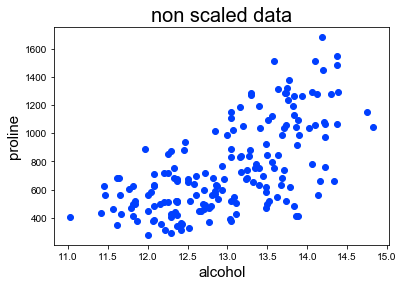

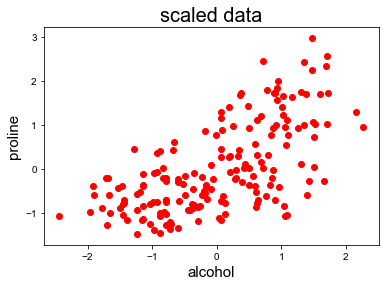

In [62]:
#図示
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-bright')
plt.scatter(non_scaled_feature["alcohol"], non_scaled_feature["proline"])
plt.xlabel("alcohol", fontsize=15)
plt.ylabel("proline", fontsize=15)
plt.title("non scaled data", fontsize=20)
plt.show()

plt.style.use('seaborn-bright')
plt.scatter(df_scaled_feature["alcohol"], df_scaled_feature["proline"], c='red')
plt.xlabel("alcohol", fontsize=15)
plt.ylabel("proline", fontsize=15)
plt.title("scaled data", fontsize=20)
plt.show()